In [5]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached matplotlib-3.4.2-cp38-cp38-win_amd64.whl (7.1 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp38-cp38-win_amd64.whl
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached grpc

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
!nvidia-smi

Wed Jun 23 14:09:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 466.47       Driver Version: 466.47       CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   56C    P8     8W /  N/A |    245MiB /  6144MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, 
                              mp_holistic.FACE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, 
                              mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [7]:
#Keypoints using MP Holistic
cap = cv2.VideoCapture('2.mp4')
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()


        image, results = mediapipe_detection(frame, holistic)
        
        draw_styled_landmarks(image, results)


        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [8]:
results.face_landmarks.landmark

[x: 0.4697457
y: 0.38749313
z: -0.0064325174
, x: 0.46477294
y: 0.37861058
z: -0.028221166
, x: 0.4676075
y: 0.37980857
z: -0.011149502
, x: 0.456993
y: 0.36597833
z: -0.026143555
, x: 0.4634672
y: 0.3754696
z: -0.031831544
, x: 0.46244726
y: 0.37023416
z: -0.03199612
, x: 0.46042562
y: 0.35562485
z: -0.023971047
, x: 0.42010927
y: 0.35350606
z: 0.003889305
, x: 0.457691
y: 0.34447038
z: -0.024597606
, x: 0.45600998
y: 0.33948132
z: -0.028425653
, x: 0.45079726
y: 0.321479
z: -0.033436183
, x: 0.47032577
y: 0.38890445
z: -0.004615613
, x: 0.47099236
y: 0.3897172
z: -0.0019737047
, x: 0.47153845
y: 0.38978806
z: 0.0010734983
, x: 0.47186384
y: 0.38952428
z: 0.002993464
, x: 0.47217587
y: 0.39089182
z: 0.0028147756
, x: 0.47278824
y: 0.39247373
z: 0.0023683982
, x: 0.4735922
y: 0.39389285
z: 0.003919235
, x: 0.47526422
y: 0.39567474
z: 0.010112338
, x: 0.4657468
y: 0.379621
z: -0.024425536
, x: 0.4603641
y: 0.3788131
z: -0.015601876
, x: 0.39473283
y: 0.33678144
z: 0.024863154
, x: 0.438

In [8]:
landmarks = results.pose_landmarks.landmark
landmarks

[x: 0.352018
y: 0.24267986
z: -0.5218855
visibility: 0.9995148
, x: 0.38947183
y: 0.22697237
z: -0.47173357
visibility: 0.9992217
, x: 0.4057565
y: 0.22881825
z: -0.47260502
visibility: 0.99932015
, x: 0.42273527
y: 0.2312768
z: -0.47338468
visibility: 0.9993345
, x: 0.3541056
y: 0.22630689
z: -0.4521584
visibility: 0.99892414
, x: 0.3451518
y: 0.22717182
z: -0.45211887
visibility: 0.99888784
, x: 0.3371527
y: 0.2279812
z: -0.45234093
visibility: 0.99870336
, x: 0.461483
y: 0.2544183
z: -0.17124578
visibility: 0.9994847
, x: 0.34712735
y: 0.24611166
z: -0.075986184
visibility: 0.9985014
, x: 0.377233
y: 0.27004611
z: -0.40971258
visibility: 0.9998076
, x: 0.33843672
y: 0.26860642
z: -0.38165563
visibility: 0.9996724
, x: 0.59332985
y: 0.4014875
z: -0.091298066
visibility: 0.99996716
, x: 0.2382519
y: 0.41113278
z: 0.16556372
visibility: 0.99954236
, x: 0.6328539
y: 0.5559007
z: -0.25548342
visibility: 0.98930836
, x: 0.21671173
y: 0.5696319
z: 0.25215378
visibility: 0.839018
, x: 0.549

In [10]:
shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]            

In [12]:
shoulder, elbow, wrist

([0.5933298468589783, 0.4014874994754791],
 [0.6328539252281189, 0.5559006929397583],
 [0.5499998927116394, 0.598996639251709])

In [13]:
mp_holistic.PoseLandmark.LEFT_SHOULDER.value

11

In [14]:
len(landmarks)

33

In [31]:
draw_styled_landmarks(frame, results)

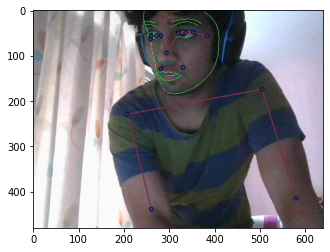

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
#extract keypoints values

# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res,visibility])
#     pose.append(test)

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)

In [44]:
pose.shape, face.shape, lh.shape, rh.shape, np.zeros(21*3).shape

((132,), (1404,), (63,), (63,), (63,))

In [41]:
lh, rh #, face, pose

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, face, lh, rh])

In [50]:
extract_keypoints(results).shape

(1662,)

In [51]:
33*4+468*3+21*3+21*3

1662

In [45]:
#setup folders and collection
DATA_PATH = os.path.join('test_mp_data')

# actions = np.array(['hello', 'thanks', 'iloveyou'])
actions = np.array(['B-Curls', 'OH-Press', 'Neutral'])
no_sequences = 30
sequence_length = 30

In [8]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [17]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 848)
while True:
    ret, frame = cap.read()
#     frame = imutils.resize(frame, width=480, height=848)
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     frame = cv2.resize(frame, (480, 848))
    cv2.imshow('Feed', frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [14]:
!pip install imutils
import imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=082f6f2fa9b1fbe85ac7704492642ad7e6a505538339971d22bb3c7db6d3b71d
  Stored in directory: c:\users\akash\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [11]:
# #collect keypoint values for training and testing
# cap = cv2.VideoCapture(0)
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     for action in actions:
#         for sequence in range(no_sequences):
#             for frame_num in range(sequence_length):
#                 ret, frame = cap.read()
#                 image, results = mediapipe_detection(frame, holistic)
#                 draw_styled_landmarks(image, results)

#                 if frame_num == 0:
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)


#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
#     cap.release()
#     cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)

In [18]:
#collect keypoint values for training and testing
cap = cv2.VideoCapture(0)
action = "Neutral"
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for sequence in range(no_sequences):
        for frame_num in range(sequence_length):
            ret, frame = cap.read()
            image, results = mediapipe_detection(frame, holistic)
            draw_styled_landmarks(image, results)

            if frame_num == 0:
                cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(2000)
            else: 
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)


            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()

In [19]:
#processs data and create labels and features
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'B-Curls': 0, 'OH-Press': 1, 'Neutral': 2}

In [61]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
            except:
                pass
        sequences.append(window)
        labels.append(label_map[action])

In [62]:
X = np.array(sequences)

In [63]:
y = to_categorical(labels).astype(int)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [50]:
#build and train LSTM network
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [65]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [66]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [67]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 2s/step - loss: 1.1125 - categorical_accuracy: 0.2994
Epoch 2/2000
3/3 [==============================] - 1s 224ms/step - loss: 1.0925 - categorical_accuracy: 0.2759
Epoch 3/2000
3/3 [==============================] - 1s 186ms/step - loss: 1.1314 - categorical_accuracy: 0.3073
Epoch 4/2000
3/3 [==============================] - 1s 218ms/step - loss: 1.1077 - categorical_accuracy: 0.3679
Epoch 5/2000
3/3 [==============================] - 1s 180ms/step - loss: 1.0565 - categorical_accuracy: 0.5655
Epoch 6/2000
3/3 [==============================] - 1s 210ms/step - loss: 1.0677 - categorical_accuracy: 0.5948
Epoch 7/2000
3/3 [==============================] - 1s 184ms/step - loss: 1.0703 - categorical_accuracy: 0.4345
Epoch 8/2000
3/3 [==============================] - 1s 190ms/step - loss: 0.9883 - categorical_accuracy: 0.6849
Epoch 9/2000
3/3 [==============================] - 1s 187ms/step - loss: 0.6996 - categorical_accuracy: 0.

KeyboardInterrupt: 

In [68]:
res = model.predict(X_test)

In [69]:
actions[np.argmax(res[4])]

'Neutral'

In [70]:
actions[np.argmax(y_test[4])]

'Neutral'

In [71]:
model.save('gym_4.h5')

In [75]:
del model

In [76]:
# model.load_weights('gym.h5')
model = load_model('gym.h5')

In [14]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

In [35]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [36]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [78]:
colors = [(245,117,16), (117,245,16), (16,117,245)]

sequence = []
sentence = []
predictions = []
threshold = 0.7

curls = 0
press = 0

cap = cv2.VideoCapture('1.mp4') 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        try:
            image, results = mediapipe_detection(frame, holistic)

            draw_styled_landmarks(image, results)

            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]
        except:
            pass
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    try:
                        landmarks = results.pose_landmarks.landmark
                        shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
                        elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
                        wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]            
                        angle = calculate_angle(shoulder, elbow, wrist)
                        if actions[np.argmax(res)] == "B-Curls" or actions[np.argmax(res)] == "Neutral":
                            if angle > 150:
                                stage_c = "down"
                            if angle < 60 and stage_c =='down':
                                stage_c="up"
                                curls +=1
                                print(f"curls: {curls}")
                        elif actions[np.argmax(res)] == "OH-Press" or actions[np.argmax(res)] == "Neutral":
                            if angle < 90:
                                stage_o = "down"
                            if angle > 100 and stage_o =='down':
                                stage_o="up"
                                press +=1
                                print(f"press: {press}")
                    except:
                        pass
                    
#                     if len(sentence) > 0: 
#                         if actions[np.argmax(res)] != sentence[-1]:
#                             sentence.append(actions[np.argmax(res)])
#                     else:
#                         sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (255,0,0), -1)
        cv2.putText(image, f"REPS: curls: {curls} | press: {press}", (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

press: 1
press: 2
press: 3
press: 4
press: 5
press: 6
press: 7
press: 8


In [40]:
np.unique(predictions[-10:])[0]

0

In [18]:
res

array([9.9653304e-01, 4.4731562e-05, 3.4222014e-03], dtype=float32)

In [42]:
label_map

{'B-Curls': 0, 'OH-Press': 1, 'Neutral': 2}

In [43]:
actions

array(['B-Curls', 'OH-Press', 'Neutral'], dtype='<U8')